<a href="https://colab.research.google.com/github/jangbulama/ai-workshop-1/blob/main/week4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import os

# List files in the current directory
print(os.listdir())


['.ipynb_checkpoints', 'Copy of devnagari digit.zip', 'Extract', 'Test.zip', 'Week4', 'week4.ipynb']


In [ ]:
import zipfile

zip_path = "Test.zip"  # Ensure this matches your file location

if os.path.exists(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        file_list = zip_ref.namelist()
        print("Files inside the ZIP:", file_list)
else:
    print("File not found! Check the path again.")


Files inside the ZIP: ['Test/', 'Test/digit_0/', 'Test/digit_0/103277.png', 'Test/digit_0/103281.png', 'Test/digit_0/103309.png', 'Test/digit_0/103311.png', 'Test/digit_0/103322.png', 'Test/digit_0/103325.png', 'Test/digit_0/103340.png', 'Test/digit_0/103343.png', 'Test/digit_0/103358.png', 'Test/digit_0/103366.png', 'Test/digit_0/103369.png', 'Test/digit_0/103372.png', 'Test/digit_0/103380.png', 'Test/digit_0/103386.png', 'Test/digit_0/103396.png', 'Test/digit_0/103398.png', 'Test/digit_0/103401.png', 'Test/digit_0/103404.png', 'Test/digit_0/103414.png', 'Test/digit_0/103421.png', 'Test/digit_0/103424.png', 'Test/digit_0/103425.png', 'Test/digit_0/103427.png', 'Test/digit_0/103439.png', 'Test/digit_0/12286.png', 'Test/digit_0/12296.png', 'Test/digit_0/12305.png', 'Test/digit_0/12313.png', 'Test/digit_0/12314.png', 'Test/digit_0/12333.png', 'Test/digit_0/12346.png', 'Test/digit_0/12348.png', 'Test/digit_0/12350.png', 'Test/digit_0/12352.png', 'Test/digit_0/12358.png', 'Test/digit_0/123

In [ ]:
import zipfile
import os

# Path to your ZIP file
zip_file_path = 'Test.zip'

# Path where you want to extract the files
extract_folder = 'Extract'

# Check if the folder exists, if not, create it
if not os.path.exists(extract_folder):
    os.makedirs(extract_folder)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"Files extracted to {extract_folder}")

# List the files in the extracted folder
extracted_files = os.listdir(extract_folder)

# Print the files in the folder
print(extracted_files)


Files extracted to Extract
['Test', 'Train']


In [ ]:

#Manual Gradient Calculation in Numpy

import numpy as np
# Simple function f(x) = x^2
def f(x):
    return x ** 2
# Manual derivative (f’(x) = 2x)
def gradient(x):
    return 2 * x
# Update rule: x = x - learning_rate * gradient
x = 5.0
learning_rate = 0.1
for _ in range(10): # Manually optimize for 10 steps
    x -= learning_rate * gradient(x)

In [ ]:
# Gradient Computations with Keras.

import tensorflow as tf
x = tf.Variable(5.0) # Trainable variable
with tf.GradientTape() as tape:
    y = x ** 2 # y = x^2
grad = tape.gradient(y, x) # Computes dy/dx automatically
print(grad.numpy())

10.0


In [ ]:
import numpy as np
import tensorflow as tf
import time
# Create large random matrices
size = (1000, 1000)
A = np.random.rand(*size)
B = np.random.rand(*size)
# NumPy Multiplication
start = time.time()
C_numpy = np.dot(A, B)
print("NumPy Time:", time.time() - start)
# TensorFlow Multiplication (for colab uses GPU Runtime if available)
A_tf = tf.constant(A)
B_tf = tf.constant(B)
start = time.time()
C_tf = tf.matmul(A_tf, B_tf)
print("TensorFlow Time:", time.time() - start)

NumPy Time: 0.054003000259399414
TensorFlow Time: 0.08497118949890137


In [ ]:
from tensorflow.keras.layers import Dense

# Creating a dense layer with 64 units and 'sigmoid' activation
layer = Dense(64, activation='sigmoid')


In [ ]:
# 4 Building a Simple Fully Connected Neural Network in Keras.
# In this section, we will build a general pipeline for solving an image classification problem using a fully
# connected neural network in Keras. This pipeline will

Training set: (17000, 28, 28, 1), Labels: (17000, 10)
Testing set: (3000, 28, 28, 1), Labels: (3000, 10)


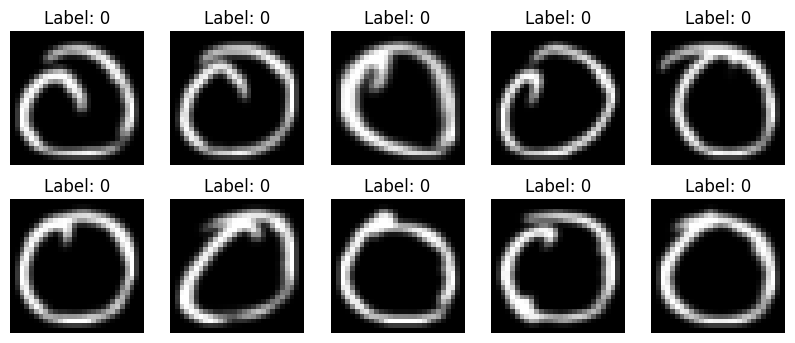

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image # Import Pillow

# Define dataset paths
# train_dir = "dataset/Train/"
# test_dir = "dataset/Test/"
train_dir = "Extract/Train/"
test_dir = "Extract/Test/"


# Define image size
img_height, img_width = 28, 28

# Function to load images and labels using PIL
def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))  # Sorted class names (digit_0, digit_1, ...)
    class_map = {name: i for i, name in enumerate(class_names)}  # Map class names to labels
    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            try:
                # Load image using PIL
                img = Image.open(img_path).convert("L")  # Convert to grayscale
                img = img.resize((img_width, img_height))  # Resize to (28,28)
                img = np.array(img) / 255.0  # Normalize pixel values to [0,1]
                images.append(img)
                labels.append(label)
            except Exception as e:
                print(f"Could not load image {img_path}: {e}")
    return np.array(images), np.array(labels)

# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1)  # Shape (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.show()


In [ ]:
# Loading and Preprocessing MNIST Handwritten Digit Dataset:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize the images to values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0
# Flatten the 28x28 images into 784-dimensional vectors
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)
# One-hot encode the labels (0-9) for classification
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
# 2. Build the Model:
# Keras provides two ways to build models: Sequential API and Functional API. Both approaches
# allow you to create neural networks, but the choice between them depends on the complexity and
# flexibility of the model you want to create. Here’s a description of both, along with simple examples:


In [ ]:
import tensorflow as tf
from tensorflow import keras

# Define model parameters
num_classes = 10
input_shape = (28, 28, 1)

# Build the model
model = keras.Sequential([
    keras.layers.Input(shape=input_shape),
    keras.layers.Flatten(),  # Convert 28x28 image into a 1D vector
    keras.layers.Dense(64, activation="sigmoid"),
    keras.layers.Dense(128, activation="sigmoid"),
    keras.layers.Dense(256, activation="sigmoid"),
    keras.layers.Dense(num_classes, activation="softmax")  # Output layer for classification
])


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 2. Functional API:
# The Functional API is a more flexible way to define models. It allows you to define complex models with
# multiple inputs, outputs, shared layers, or even non-linear topologies (such as multi-branch networks).
# You have more control over the architecture and can define layers that may not be directly connected.




import tensorflow as tf
from tensorflow import keras

# Define model parameters
num_classes = 10
input_shape = (28, 28, 1)

def build_functional_model():
    """Builds and returns a functional model with three hidden layers."""
    # Input layer
    inputs = keras.Input(shape=input_shape)

    # Flatten layer
    x = keras.layers.Flatten()(inputs)

    # Hidden layers
    x = keras.layers.Dense(64, activation="sigmoid")(x)
    x = keras.layers.Dense(128, activation="sigmoid")(x)
    x = keras.layers.Dense(256, activation="sigmoid")(x)

    # Output layer
    outputs = keras.layers.Dense(num_classes, activation="softmax")(x)

    # Create and return the model
    return keras.Model(inputs=inputs, outputs=outputs)

# Build and summarize the model
functional_model = build_functional_model()
functional_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compiling and Training the Model:

In [ ]:
functional_model.compile(
    optimizer=keras.optimizers.Adam(),  # Adam optimizer for better performance
    loss=keras.losses.SparseCategoricalCrossentropy(),  # Suitable for integer-labeled classification
    metrics=["accuracy"]  # Track accuracy during training
)


In [ ]:
model.compile(
    optimizer="sgd",  # Stochastic Gradient Descent optimizer
    loss="categorical_crossentropy",  # Suitable for multi-class classification
    metrics=["accuracy"]  # Measure accuracy during training
)


In [ ]:
model.fit(
    x=x_train,  # Training data
    y=y_train,  # Labels
    batch_size=32,  # Number of samples per batch
    epochs=10,  # Number of epochs
    validation_split=0.2,  # Split 20% of the data for validation
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)],  # Early stopping callback
    verbose=1  # Verbosity level (1 = progress bar)
)


Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(32, 784), dtype=float32). Expected shape (None, 28, 28, 1), but input has incompatible shape (32, 784)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 784), dtype=float32)
  • training=True
  • mask=None

In [ ]:
batch_size = 128
epochs = 2000

# Callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras", save_best_only=True),  # Save the best model
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True),  # Stop early with best weights
]

# Train the model with callbacks and validation split
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.15,  # Split 15% of the data for validation
    callbacks=callbacks,
    verbose=1  # Optionally, you can set verbose to 2 if you prefer one line per epoch
)


Epoch 1/2000


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 784), dtype=float32). Expected shape (None, 28, 28, 1), but input has incompatible shape (None, 784)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 784), dtype=float32)
  • training=True
  • mask=None

In [ ]:
batch_size = 128
epochs = 2000
# Callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=4 ),
]
# Train the model with callbacks and validation split
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.15,
    callbacks=callbacks,
)

Epoch 1/2000


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 784), dtype=float32). Expected shape (None, 28, 28, 1), but input has incompatible shape (None, 784)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 784), dtype=float32)
  • training=True
  • mask=None

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense

# Define the Fully Connected Network (FCN) model
def create_fcn_model(input_shape, num_classes):
    model = Sequential([
        Input(shape=input_shape),  # Define input explicitly
        Flatten(),  # Convert 28x28 to 1D vector
        Dense(64, activation='sigmoid'),
        Dense(128, activation='sigmoid'),
        Dense(256, activation='sigmoid'),
        Dense(num_classes, activation='softmax')  # Output layer for 10 classes
    ])
    return model

# Define input shape and number of classes
input_shape = (28, 28, 1)
num_classes = 10

# Create and compile the model
model = create_fcn_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Ensure images are reshaped correctly
x_train = x_train.reshape(-1, 28, 28, 1)  # Reshape to (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert data type to float32 (optional but recommended)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

print(f"New Training Shape: {x_train.shape}")
print(f"New Testing Shape: {x_test.shape}")

New Training Shape: (60000, 28, 28, 1)
New Testing Shape: (10000, 28, 28, 1)


In [ ]:
# # Compile the model
# model.compile(
#     optimizer='adam',  # Adam optimizer for efficient learning
#     loss='sparse_categorical_crossentropy',  # Suitable for integer labels
#     metrics=['accuracy']  # Evaluate model performance using accuracy
# )

# print("Model compiled successfully!")

# Compile the model with categorical crossentropy (for one-hot labels)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Change from sparse_categorical_crossentropy
    metrics=['accuracy']
)

print("Model compiled successfully!")





Model compiled successfully!


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define callbacks
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_loss", mode="min")
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    x_train, y_train,  # Training data
    batch_size=128,  # Batch size
    epochs=20,  # Number of epochs
    validation_split=0.2,  # 20% of training data used for validation
    callbacks=[checkpoint, early_stopping]  # Using callbacks for best model saving and overfitting prevention
)

print("Model training complete!")


Epoch 1/20
370/375 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4149 - loss: 1.7176

375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4187 - loss: 1.7078 - val_accuracy: 0.8917 - val_loss: 0.3965
Epoch 2/20
372/375 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8992 - loss: 0.3662

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8992 - loss: 0.3658 - val_accuracy: 0.9242 - val_loss: 0.2594
Epoch 3/20
368/375 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9282 - loss: 0.2506

375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9283 - loss: 0.2502 - val_accuracy: 0.9380 - val_loss: 0.2084
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9452 - loss: 0.1884

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9452 - loss: 0.1884 - val_accuracy: 0.9501 - val_loss: 0.1730
Epoch 5/20
372/375 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9555 - loss: 0.1558

375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9555 - loss: 0.1557 - val_accuracy: 0.9558 - val_loss: 0.1486
Epoch 6/20
370/375 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9628 - loss: 0.1278

375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9628 - loss: 0.1278 - val_accuracy: 0.9578 - val_loss: 0.1410
Epoch 7/20
374/375 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9676 - loss: 0.1118

375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9676 - loss: 0.1117 - val_accuracy: 0.9605 - val_loss: 0.1295
Epoch 8/20
371/375 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9724 - loss: 0.0931

375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9724 - loss: 0.0931 - val_accuracy: 0.9621 - val_loss: 0.1274
Epoch 9/20
371/375 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9750 - loss: 0.0832

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9750 - loss: 0.0832 - val_accuracy: 0.9646 - val_loss: 0.1176
Epoch 10/20
370/375 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9783 - loss: 0.0719

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9783 - loss: 0.0719 - val_accuracy: 0.9667 - val_loss: 0.1144
Epoch 11/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9820 - loss: 0.0646 - val_accuracy: 0.9653 - val_loss: 0.1210
Epoch 12/20
369/375 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9831 - loss: 0.0589

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9830 - loss: 0.0589 - val_accuracy: 0.9687 - val_loss: 0.1117
Epoch 13/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9845 - loss: 0.0545 - val_accuracy: 0.9668 - val_loss: 0.1142
Epoch 14/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9867 - loss: 0.0488 - val_accuracy: 0.9693 - val_loss: 0.1164
Epoch 15/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9877 - loss: 0.0430 - val_accuracy: 0.9667 - val_loss: 0.1202
Epoch 16/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9886 - loss: 0.0373 - val_accuracy: 0.9683 - val_loss: 0.1157
Epoch 17/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9905 - loss: 0.0333 - val_accuracy: 0.9689 - val_loss: 0.1184
Model training complete!


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

# Print results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9625 - loss: 0.1240
Test Loss: 0.1078
Test Accuracy: 0.9682


In [ ]:
# Save the trained model to a .h5 file
model.save('devnagari_digit_model.h5')

print("Model saved successfully to 'devnagari_digit_model.h5'!")


Model saved successfully to 'devnagari_digit_model.h5'!


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('devnagari_digit_model.h5')

# Re-evaluate the loaded model on the test set
loaded_test_loss, loaded_test_accuracy = loaded_model.evaluate(x_test, y_test, verbose=1)

# Print results of re-evaluation
print(f"Loaded Model Test Loss: {loaded_test_loss:.4f}")
print(f"Loaded Model Test Accuracy: {loaded_test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9625 - loss: 0.1240
Loaded Model Test Loss: 0.1078
Loaded Model Test Accuracy: 0.9682


In [ ]:
# Make predictions on the test set
predictions = model.predict(x_test)

# Convert the predicted probabilities to digit labels (class with the highest probability)
predicted_labels = np.argmax(predictions, axis=1)

# Print the first 10 predicted labels to verify
print("First 10 Predictions:", predicted_labels[:10])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
First 10 Predictions: [7 2 1 0 4 1 4 9 5 9]


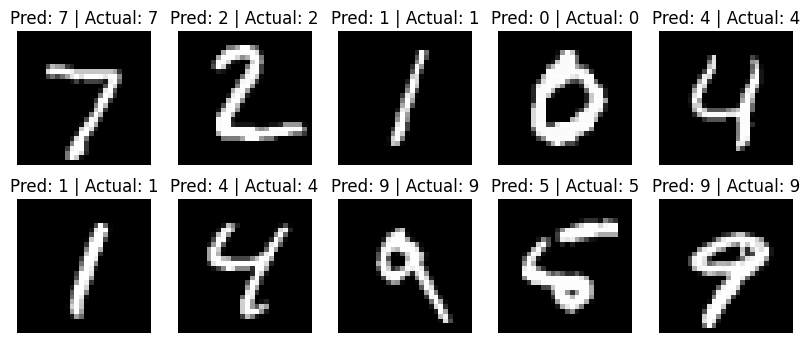

In [ ]:
# Visualize the first 10 test images with their predicted and actual labels
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]} | Actual: {np.argmax(y_test[i])}")
    plt.axis("off")
plt.show()


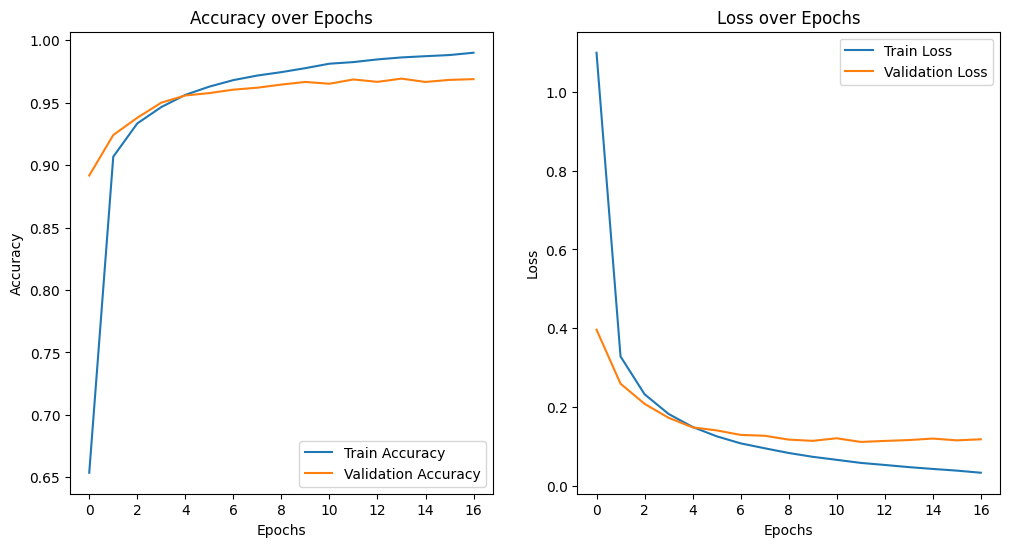

In [ ]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
